In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# modelling part
from run import run



# SL land cover situation 1 

In [2]:
%%time

# ----------- LANGTANG ------------

climatepath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut'

# get all folders togetehr 

ls_ = os.listdir(climatepath)
ls = [d for d in ls_ if not d.startswith('.')]
dir0 = os.getcwd()
# print(dir0)
# run the model for each
for d in ls:
    path = os.path.join(climatepath, d)
    if path.endswith('.csv'):
        continue
    if path.startswith('.'):
        continue
    # print(path)
    os.chdir(path)
    run()
    os.chdir(dir0)


running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.55it/s]


saving output...
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.55it/s]


saving output...
CPU times: user 27.3 s, sys: 354 ms, total: 27.6 s
Wall time: 28 s


In [3]:
# read data 
pathout = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut/12a/Sediment.out'
sedout  = pd.read_csv(pathout)

In [6]:
len(sedout[sedout.dfs>0])


114

In [7]:
len(sedout[sedout.dfspot>0])


115

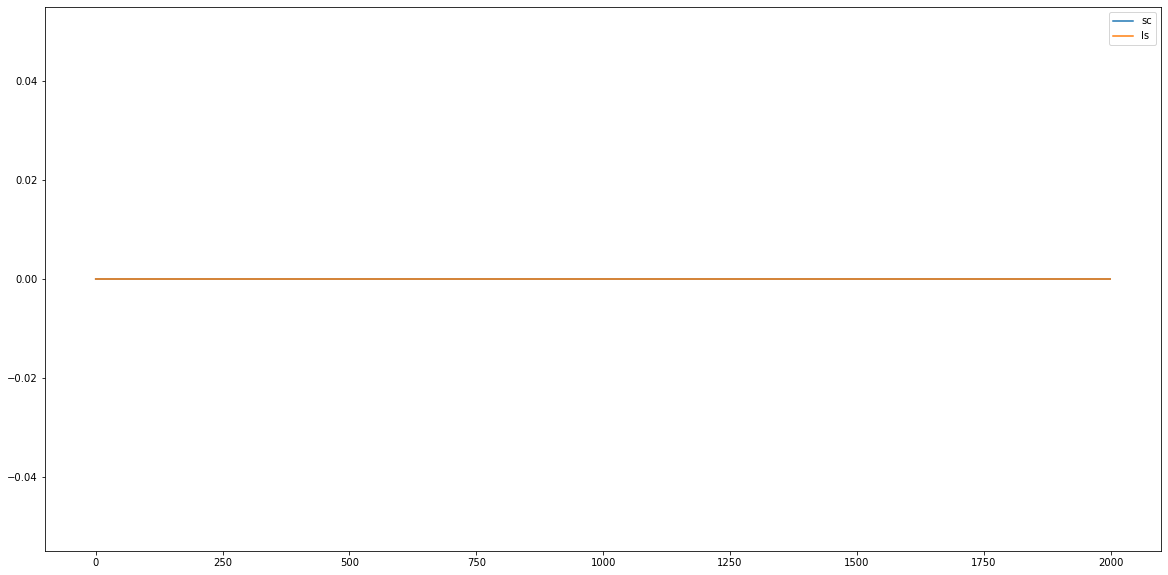

In [15]:
plt.figure(figsize = (20, 10))
# sedout.dfspot.plot(label = 'dfspot')
# sedout.dfs.plot(label = 'dfs')
sedout.sc.plot(label = 'sc')
sedout.ls.plot(label = 'ls')

plt.legend()

In [16]:
sedout.dfs.sum()/33


53.779397849113934

In [13]:
len(sedout[sedout.ls>0])


33

In [ ]:
plt.figure(figsize = (20, 10))
# sedout.sopot.plot(label = 'sopot')

# sedout.Qstl.plot(label = 'Qstl')
sedout.so.plot(label = 'so')
sedout.conc.plot(label = 'conc')

# sedout.Qdftl.plot(label = 'Qdftl')

plt.legend()

In [ ]:
# count flood hours
len(sedout[sedout.so>0])
 
# # count df hours
# sedout.so(sedout.sopot>0).count()

In [ ]:
# count df hours - this is TL case 
len(sedout[sedout.sopot>0])

In [ ]:
len(sedout[sedout.conc==0])
